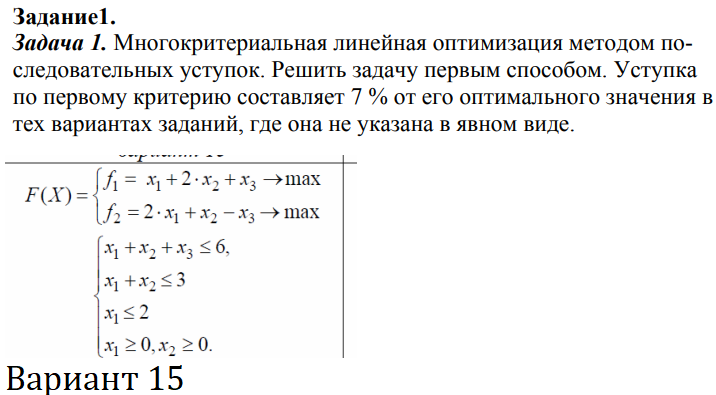

In [37]:
from IPython.display import Image
Image(filename='info.png')

In [38]:
#сделал замену на минимум.

In [45]:
import cvxpy as cp
import numpy as np
import math 

x1 = cp.Variable()
x2 = cp.Variable()
x3 = cp.Variable()
x4 = cp.Variable()

In [46]:
def find_max_min(check):
    x1 = cp.Variable()
    x2 = cp.Variable()
    x3 = cp.Variable()
    #ограничения по условиям задачи
    constraints = [x1+x2+x3<=6,
                   x1+x2<=3,
                   x1<=2,
                   x1>=0,
                   x2>=0,
                   x3>=0
                   ]
    if check:
        obj = cp.Maximize(x1+2*x2+x3)
    else:
       
        obj = cp.Maximize(2*x1+x2-x3)
    prob = cp.Problem(obj, constraints)
    prob.solve() 
    print("status:", prob.status)
    print("optimal val:", np.round(prob.value, 5))
    print("optimal var:\n{0:12}x1 = {1}\n{0:12}x2 = {2}\n{0:12}x3 = {3}".format('',np.round(x1.value, 5), np.round(x2.value, 5), np.round(x3.value, 5) ))
    return np.round(prob.value, 5)

In [47]:
max_ch = find_max_min(True)

status: optimal
optimal val: 9.0
optimal var:
            x1 = 0.0
            x2 = 3.0
            x3 = 3.0


In [48]:
min_ch = find_max_min(False)

status: optimal
optimal val: 5.0
optimal var:
            x1 = 2.0
            x2 = 1.0
            x3 = 0.0


In [49]:
constraints = [x1+x2+x3<=6,
                   x1+x2<=3,
                   x1<=2,
                   x1>=0,
                   x2>=0,
                   x3>=0,
    (max_ch-(x1+2*x2+x3))/max_ch-x4<=0,
    (min_ch-((2)*x1+x2-x3))/min_ch-x4<=0       
                   ]
obj = cp.Minimize(x4)
prob = cp.Problem(obj, constraints)
prob.solve(verbose=True)
print("status:", prob.status)
print("optimal val:", x4.value)
print("optimal var:\n{0:12}x1 = {1}\n{0:12}x2 = {2}\n{0:12}x3 = {3}".format('',np.round(x1.value, 5), np.round(x2.value, 5),np.round(x3.value, 5) ))


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +3.402e-01  -9.219e+00  +2e+01  2e-01  6e-01  1e+00  2e+00    ---    ---    1  1  - |  -  - 
 1  +4.834e-01  -6.447e-02  +2e+00  1e-02  8e-02  3e-01  3e-01  0.9217  7e-02   1  1  1 |  0  0
 2  +3.686e-01  +3.235e-01  +1e-01  1e-03  7e-03  2e-02  3e-02  0.9149  4e-03   1  1  1 |  0  0
 3  +3.573e-01  +3.567e-01  +2e-03  1e-05  8e-05  3e-04  3e-04  0.9886  2e-04   1  1  1 |  0  0
 4  +3.571e-01  +3.571e-01  +2e-05  1e-07  9e-07  3e-06  3e-06  0.9890  1e-04   1  1  1 |  0  0
 5  +3.571e-01  +3.571e-01  +2e-07  2e-09  1e-08  3e-08  4e-08  0.9890  1e-04   1  0  0 |  0  0
 6  +3.571e-01  +3.571e-01  +2e-09  2e-11  1e-10  4e-10  4e-10  0.9890  1e-04   2  0  0 |  0  0

OPTIMAL (within feastol=1.1e-10, reltol=6.2e-09, abstol=2.2e-09).
Runtime: 0.000861 seconds.

status: optimal
optimal val: 0.3571428573023876